In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap
import os

from skimage import data, io, filters, color
from skimage.filters import threshold_otsu, threshold_adaptive

from skimage.transform import resize, rotate

(2823, 2055, 3)
(1056, 816, 3)


/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


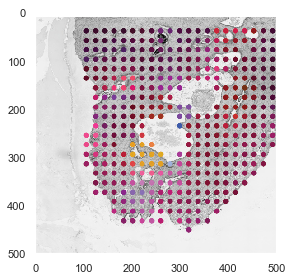

/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


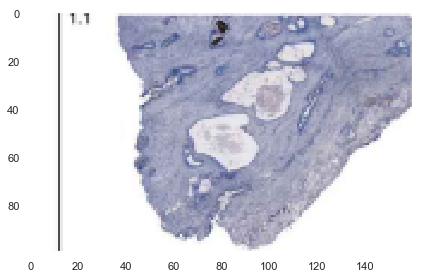

In [5]:
slides = '/home/garner1/Work/dataset/SSF/prostate-twelve/slides.tif'
spots = '/home/garner1/Work/dataset/SSF/prostate-twelve/joint-field-dimensionality-reduction-tSNE-dots-split-grid_small.jpg'

image = io.imread(spots)
plt.figure()
io.imshow(image[0:500,0:500,:]) #does not keep the high resolution
plt.grid(False)
print image.shape

image = io.imread(slides)
plt.figure()
io.imshow(image[110:210,90:250,:]) #does not keep the high resolution
plt.grid(False)
print image.shape

/home/garner1/anaconda2/lib/python2.7/site-packages/skimage/filters/thresholding.py:271: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (100, 160, 3) looks like an RGB image
  warn(msg.format(image.shape))
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning

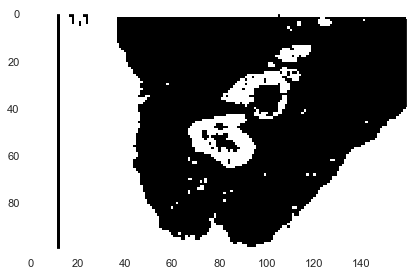

/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


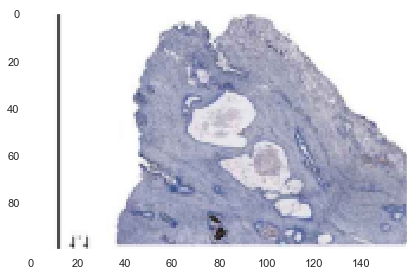

/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)
/home/garner1/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


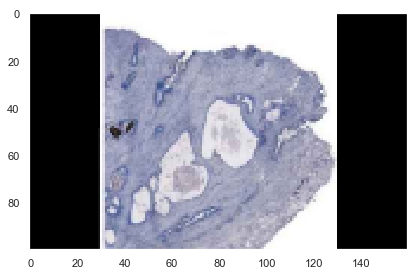

In [71]:
# %matplotlib

# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 300

filepath = '/home/garner1/Work/dataset/SSF/prostate-twelve/slides.tif'
slide = io.imread(filepath)
cropped = slide[110:210,90:250,:]



edges = filters.sobel(cropped[:,:,0])

plt.figure()
# io.imshow(color.rgb2hsv(cropped)) #does not keep the high resolution

global_thresh = threshold_otsu(cropped)
binary_global = cropped[:,:,0] > global_thresh
io.imshow(binary_global) #does not keep the high resolution
plt.grid(False)

plt.figure()
io.imshow(np.flipud(cropped)) #does not keep the high resolution
plt.grid(False)

plt.figure()
io.imshow(rotate(np.flipud(cropped),270)) #does not keep the high resolution
plt.grid(False)

In [67]:
print np.sum(binary_global), (~binary_global).sum() # (0 is black) and (false is 0)

6674 8326


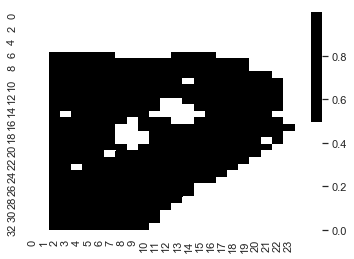

In [68]:
import numpy as np

npzfile = np.load('matglobalep11.npz')
fig = sns.heatmap(npzfile['arr_0'], cmap=ListedColormap(['white', 'black']), annot=False)

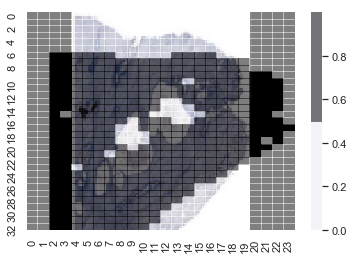

In [69]:
# add alpha (transparency) to a colormap
from matplotlib import cm 
from matplotlib.colors import LinearSegmentedColormap 
wd = cm.winter._segmentdata # only has r,g,b  
wd['alpha'] =  ((0.0, 0.0, 0.3), 
               (0.3, 0.3, 1.0),
               (1.0, 1.0, 1.0))

# modified colormap with changing alpha
al_winter = LinearSegmentedColormap('AlphaWinter', wd) 

# get the map image as an array so we can plot it 
import matplotlib.image as mpimg 
map_img = rotate(np.flipud(cropped),270)

# making and plotting heatmap 
import numpy.random as random 
heatmap_data = random.rand(8,9) 

import seaborn as sns; sns.set()
ST = sns.heatmap(npzfile['arr_0'], cmap=ListedColormap(['white', 'black']), annot=False, alpha=0.5, zorder=2)

# heatmap uses pcolormesh instead of imshow, so we can't pass through 
# extent as a kwarg, so we can't mmatch the heatmap to the map. Instead, 
# match the map to the heatmap:

ST.imshow(map_img,
          aspect = ST.get_aspect(),
          extent = ST.get_xlim() + ST.get_ylim(),
          zorder = 1) #put the map under the heatmap

from matplotlib.pyplot import show 
show()
